In [1]:
import json
import csv

with open('Output\Output_2024-04-18_09-39.json') as f:
    data = json.load(f)

# 提取"name"，"Iterations"和"Is_Success"字段
module_names = [item['module_name'] for item in data["Debug_list"]]
module_list = [item['module_list'] for item in data["Debug_list"]]
print(module_names)

print(module_list[1])
fieldname = ["Name","Is_Success","Error_type","Iterations","Total_time","Sim_time","Debug_time","Score_time","Trans_time"]
with open('统计.csv', 'w',newline="") as file:
    writer = csv.DictWriter(file, fieldnames=fieldname)
    writer.writeheader()
    for i,name in enumerate(module_names):
        # Create a CSV dictionary writer and add the student header as field names
        # Use writerows() not writerow()
        writer.writerow({"Name":name})
        for j in range(len(module_list[i])):
            module_list[i][j]["Sim_time"] = round(module_list[i][j]["Sim_time"]/module_list[i][j]["Total_time"] if module_list[i][j]["Total_time"] != 0 else 0,2)
            module_list[i][j]["Debug_time"] = round(module_list[i][j]["Debug_time"]/module_list[i][j]["Total_time"] if module_list[i][j]["Total_time"] != 0 else 0,2)
            module_list[i][j]["Score_time"] = round(module_list[i][j]["Score_time"]/module_list[i][j]["Total_time"] if module_list[i][j]["Total_time"] != 0 else 0,2)
            module_list[i][j]["Trans_time"] = round(module_list[i][j]["Trans_time"]/module_list[i][j]["Total_time"] if module_list[i][j]["Total_time"] != 0 else 0,2)
        writer.writerows(module_list[i])
        #写入一行空行
        writer.writerow({})

['accu', 'adder_32bit', 'adder_8bit', 'adder_pipe_64bit', 'alu', 'asyn_fifo', 'div_16bit', 'freq_div', 'multi_booth_8bit', 'multi_pipe_8bit', 'parallel2serial', 'radix2_div', 'serial2parallel', 'traffic_light', 'width_8to16']
[{'Name': 'adder_32bit_func_insufficient_bitwidth', 'Is_Success': False, 'Error_type': 'func', 'Iterations': 9, 'Total_time': 540.85, 'Sim_time': 11.11, 'Debug_time': 520.13, 'Score_time': 9.01, 'Trans_time': 0.6}, {'Name': 'adder_32bit_func_logical_error', 'Is_Success': True, 'Error_type': 'func', 'Iterations': 6, 'Total_time': 423.6, 'Sim_time': 5.53, 'Debug_time': 410.77, 'Score_time': 6.39, 'Trans_time': 0.91}, {'Name': 'adder_32bit_func_multiprocess', 'Is_Success': True, 'Error_type': 'func', 'Iterations': 1, 'Total_time': 71.27, 'Sim_time': 2.46, 'Debug_time': 66.89, 'Score_time': 1.41, 'Trans_time': 0.51}, {'Name': 'adder_32bit_func_not_connecting_allport', 'Is_Success': True, 'Error_type': 'func', 'Iterations': 1, 'Total_time': 80.84, 'Sim_time': 2.38, 'De

In [2]:
syntax_true = 0
syntax_false = 0
function_true = 0
function_false = 0

for i,module in enumerate(module_list):
    for each_module in module:
        if each_module["Is_Success"] and each_module["Error_type"] == "syn":
            syntax_true+=1
        elif each_module["Is_Success"] and each_module["Error_type"] == "func":
            function_true+=1
        elif not each_module["Is_Success"] and each_module["Error_type"] == "syn":
            syntax_false+=1
        elif not each_module["Is_Success"] and each_module["Error_type"] == "func":
            function_false+=1
        else:
            print(each_module)
print("syntax_ture:",syntax_true)
print("syntax_false:",syntax_false)
print("sys_fix_rate:",round(syntax_true/(syntax_true+syntax_false),2))
print("function_true:",function_true)
print("function_false:",function_false)
print("fun_fix_rate:",round(function_true/(function_true+function_false),2))
print("total",syntax_true+syntax_false+function_true+function_false)
print("total_fix_rate:",round((syntax_true+function_true)/(syntax_true+syntax_false+function_true+function_false),2))



syntax_ture: 76
syntax_false: 17
sys_fix_rate: 0.82
function_true: 58
function_false: 21
fun_fix_rate: 0.73
total 172
total_fix_rate: 0.78


In [3]:
import pandas as pd
data = pd.read_csv("统计.csv")
data.head()
data.iloc[0:10,:]


,Name,Is_Success,Error_type,Iterations,Total_time,Sim_time,Debug_time,Score_time,Trans_time
0,accu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,accu_function_missing_not_logic,True,func,0.0,2.69,0.58,0.00,0.00,0.42
2,accu_function_wrong_cnt,True,func,1.0,26.78,0.09,0.85,0.03,0.03
3,accu_func_insufficient_bitwidth,True,func,1.0,26.71,0.09,0.85,0.04,0.03
4,accu_func_mixupbnb,True,func,1.0,30.87,0.07,0.88,0.03,0.02
5,accu_func_multiprocess,True,func,1.0,29.51,0.08,0.86,0.04,0.02
6,accu_syntax_undefined_variable,True,syn,0.0,1.68,0.70,0.00,0.00,0.30
7,accu_syntax_wrong_data_type,True,syn,3.0,79.72,0.05,0.91,0.03,0.01
8,accu_syn_declared_var,False,syn,9.0,197.48,0.06,0.89,0.05,0.00
9,accu_syn_nonprintable&undefined_var,True,syn,3.0,74.68,0.06,0.90,0.04,0.01


In [4]:
data.loc[data['Name'].str.contains('unexpected_end', na=False), 'Error_type'] = 'syn1'
data.loc[data['Name'].str.contains('undefined_var', na=False), 'Error_type'] = 'syn2'
data.loc[data['Name'].str.contains('sub_exp', na=False) | data['Name'].str.contains('sub-exp', na=False), 'Error_type'] = 'syn3'
data.loc[data['Name'].str.contains('declared_var', na=False), 'Error_type'] = 'syn4'
data.loc[data['Name'].str.contains('non', na=False) & data['Name'].str.contains('print', na=False), 'Error_type'] = 'syn5'
data.loc[data['Name'].str.contains('data_type', na=False), 'Error_type'] = 'syn6'
data.loc[data['Name'].str.contains('port', na=False) & data['Name'].str.contains('declared', na=False), 'Error_type'] = 'syn7'
data.loc[data['Name'].str.contains('port', na=False) & data['Name'].str.contains('mode', na=False), 'Error_type'] = 'syn7'
data.loc[data['Name'].str.contains('out', na=False), 'Error_type'] = 'syn8'

data.loc[data['Name'].str.contains('bitwidth', na=False), 'Error_type'] = 'func1'
data.loc[data['Name'].str.contains('mixup', na=False)| data['Name'].str.contains('block', na=False), 'Error_type'] = 'func2'
data.loc[data['Name'].str.contains('improper', na=False) & data['Name'].str.contains('sen', na=False), 'Error_type'] = 'func3'
data.loc[data['Name'].str.contains('logic', na=False), 'Error_type'] = 'func4'
data.loc[data['Name'].str.contains('multiprocess', na=False), 'Error_type'] = 'func5'
data.loc[data['Name'].str.contains('name', na=False), 'Error_type'] = 'func6'
data.loc[data['Name'].str.contains('connect', na=False) & data['Name'].str.contains('port', na=False), 'Error_type'] = 'func7'
# save the dataframe to a new CSV file
data.to_csv("修改后统计.csv", index=False, header=True)

In [5]:
a = data.loc[data['Name'].str.contains('asyn', na=False) & data['Error_type'].str.contains('syn1', na=False), 'Iterations']
print(a)

78    9.0
79    9.0
Name: Iterations, dtype: float64


In [6]:
nan_indices = data[data['Name'].isna()].index
print(nan_indices)
dfs = []

# 初始化起始索引为0
start = 0

# 遍历所有NaN的索引
for end in nan_indices:
    # 分割DataFrame并添加到列表中
    dfs.append(data.iloc[start+1:end])
    # 更新起始索引
    start = end + 1

# 添加最后一个分割
dfs.append(data.iloc[start:])
dfs[0]


Index([13, 28, 40, 51, 64, 80, 93, 107, 121, 134, 146, 161, 174, 188, 201], dtype='int64')


,Name,Is_Success,Error_type,Iterations,Total_time,Sim_time,Debug_time,Score_time,Trans_time
1,accu_function_missing_not_logic,True,func4,0.0,2.69,0.58,0.00,0.00,0.42
2,accu_function_wrong_cnt,True,func,1.0,26.78,0.09,0.85,0.03,0.03
3,accu_func_insufficient_bitwidth,True,func1,1.0,26.71,0.09,0.85,0.04,0.03
4,accu_func_mixupbnb,True,func2,1.0,30.87,0.07,0.88,0.03,0.02
5,accu_func_multiprocess,True,func5,1.0,29.51,0.08,0.86,0.04,0.02
6,accu_syntax_undefined_variable,True,syn2,0.0,1.68,0.70,0.00,0.00,0.30
7,accu_syntax_wrong_data_type,True,syn6,3.0,79.72,0.05,0.91,0.03,0.01
8,accu_syn_declared_var,False,syn4,9.0,197.48,0.06,0.89,0.05,0.00
9,accu_syn_nonprintable&undefined_var,True,syn5,3.0,74.68,0.06,0.90,0.04,0.01
10,accu_syn_sub-exprs,True,syn3,2.0,65.01,0.05,0.91,0.03,0.01


In [7]:
cols = [
    "syn1",
    "syn2",
    "syn3",
    "syn4",
    "syn5",
    "syn6",
    "syn7",
    "syn8",
    "func1",
    "func2",
    "func3",
    "func4",
    "func5",
    "func6",
    "func7",
]
df = pd.DataFrame(columns=cols)



for i, name in enumerate(module_names):


    for j, error in enumerate(cols):


        df.loc[name, error] = (

            dfs[i]

            .loc[dfs[i]["Error_type"].str.contains(error, na=False), "Iterations"]

            .mean()

        )


# 修改列名


df.columns = [

    "unexpected end",

    "undefined variable",

    "sub exprs",

    "declared variable",

    "non printable",

    "improper data type",
    "declared port",

    "out of bounds",

    "insufficient bitwidth",

    "block non block",

    "improper_sensignal",

    "logic error",
    "multiprocess",

    "wrong module name",

    "missing port connection",

]


df.to_csv("图一.csv", index=True, header=True)

In [8]:
df = pd.read_csv("图一.csv")
import numpy as np

df = df.replace('　', np.nan)
average = df.select_dtypes(include=[np.number]).mean()
average

unexpected end             3.700000
undefined variable         2.700000
sub exprs                  3.181818
declared variable          3.000000
non printable              2.133333
improper data type         2.923077
declared port              4.000000
out of bounds              5.500000
insufficient bitwidth      4.533333
block non block            3.538462
improper_sensignal         2.833333
logic error                4.866667
multiprocess               1.222222
wrong module name          3.666667
missing port connection    3.666667
dtype: float64

* 统计asyn_fifo和radix2

In [9]:
df1 = pd.read_csv("Output\统计_2024-04-22_03-09.csv")
df2 = pd.read_csv("Output\统计_2024-04-22_01-55.csv")
df3 = pd.read_csv("Output\统计_2024-04-22_05-18.csv")
df4 = pd.read_csv("Output\统计_2024-04-22_07-40.csv")
df5 = pd.read_csv("Output\统计_2024-04-22_09-58.csv")
df6 = pd.read_csv("Output\统计_2024-04-22_12-30.csv")
df_list = [df1, df2, df3, df4, df5, df6]
df_out = pd.DataFrame(
    columns=["Name", "Error_type", "True", "False", "Fix Rate", "average Iterations"]
)

df_out["Name"] = df1["Name"]
df_out["Error_type"] = df1["Error_type"]
# df_out

In [10]:
for i, row in df_out.iterrows():
    if pd.isnull(df_out.loc[i, "Error_type"]):
        continue
    df_out.loc[i, "True"] = 0
    df_out.loc[i, "False"] = 0
    df_out.loc[i, "average Iterations"] = 0
    for df in df_list:
        # print(i,len(df))
        if i >= len(df):
            continue
        # print(df.loc[i,'Is_Success'] == True)
        df_out.loc[i, "True"] += 1 if df.loc[i, "Is_Success"] == True else 0
        # print(row['True'])
        df_out.loc[i, "False"] += 1 if df.loc[i, "Is_Success"] == False else 0
        df_out.loc[i, "average Iterations"] += df.loc[i, "Iterations"]
    cnt = df_out.loc[i, "True"] + df_out.loc[i, "False"]
    df_out.loc[i, "Fix Rate"] = df_out.loc[i, "True"] / cnt
    df_out.loc[i, "average Iterations"] = df_out.loc[i, "average Iterations"] / cnt
df_out

,Name,Error_type,True,False,Fix Rate,average Iterations
0,asyn_fifo,NaN,NaN,NaN,NaN,NaN
1,asyn_fifo_func_improper_sensignal_,func,6,0,1.0,1.5
2,asyn_fifo_func_insufficient_bitwidth,func,2,4,0.333333,8.333333
3,asyn_fifo_func_logical_error(opposite rst trig),func,1,5,0.166667,8.5
4,asyn_fifo_func_logical_error(wrong operator),func,1,5,0.166667,9.0
5,asyn_fifo_func_mixup_blocknonblock,func,6,0,1.0,1.333333
6,asyn_fifo_func_multiprocess,func,4,2,0.666667,4.0
7,asyn_fifo_func_not_all_ports_connected,func,1,5,0.166667,8.666667
8,asyn_fifo_func_wrong_module_name,func,5,1,0.833333,5.0
9,asyn_fifo_syn_assign_sub-exprs,syc,3,3,0.5,5.5


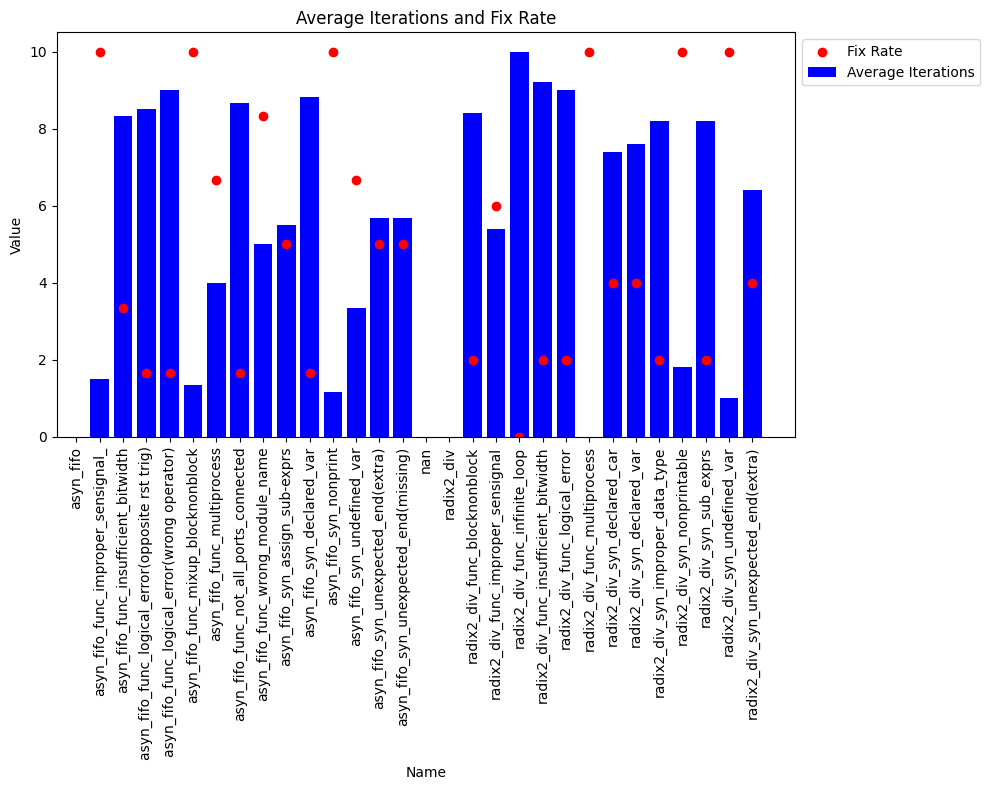

In [11]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))
# Convert 'Name' column to string type
df_out["Name"] = df_out["Name"].astype(str)

# Plotting average Iterations as a bar chart
plt.bar(
    df_out["Name"],
    df_out["average Iterations"],
    color="blue",
    label="Average Iterations",
)

# Plotting Fix Rate as a scatter plot
plt.scatter(df_out["Name"], 10 * df_out["Fix Rate"], color="red", label="Fix Rate")

# Adding labels and title
plt.xlabel("Name")
plt.ylabel("Value")
plt.title("Average Iterations and Fix Rate")
# Rotate x-axis labels
plt.xticks(rotation=90)
# Adding grid
# plt.grid(True)

# Annotating Fix Rate values
# for i in range(len(df_out['Name'])):
#     plt.text(x = df_out['Name'][i], y = 0.2+10*df_out['Fix Rate'][i], s =round( df_out['Fix Rate'][i],2), ha = 'center')

# Adding legend outside the plot
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

# Displaying the plot
plt.tight_layout()
# Displaying the plot
plt.show()